In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [6]:
#LOAD IMAGE DATASET
terinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data[:3])

print('\n')
tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi/')
print(tidakTerinfeksi_data[:3])

['C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png']


['C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_9.png', 'C1_thinF_IMG_20150604_104722_cell_79.png']


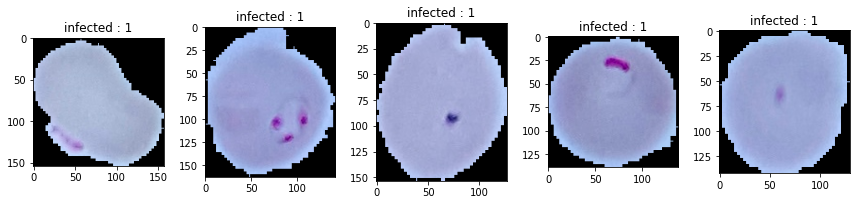

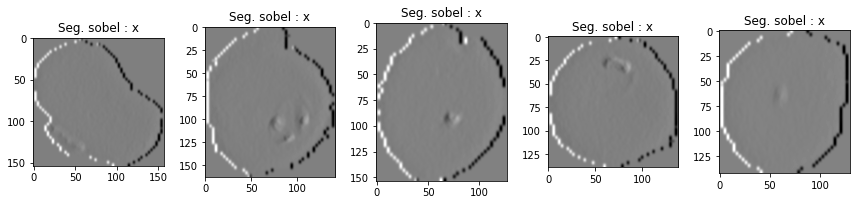

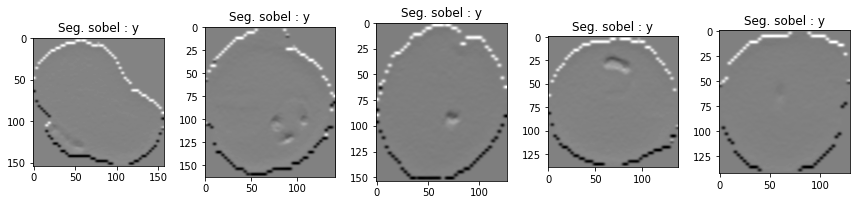

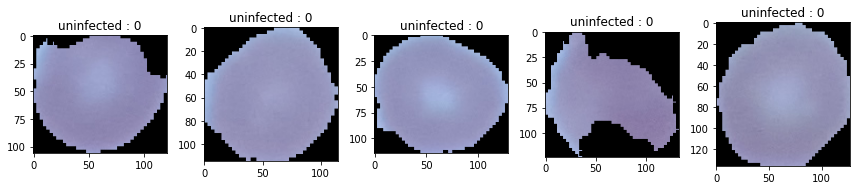

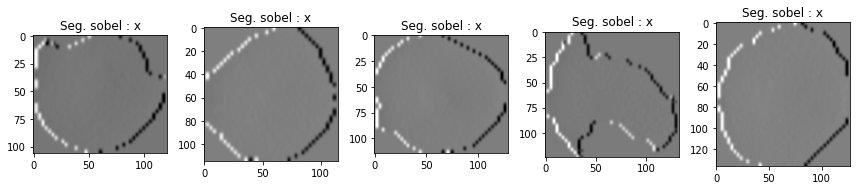

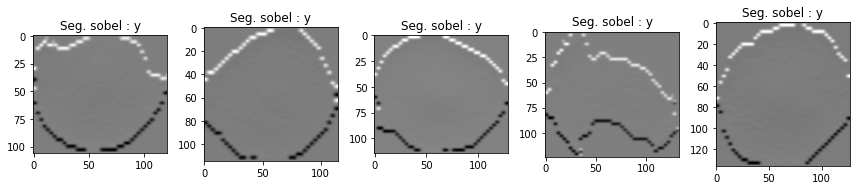

In [21]:
#VISUALISASI
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()

plt.show()

In [0]:
#SEGMENTASI DAN HUMOMENT
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))


In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/dataset/malariax.csv", x, fmt='%s',delimiter=',' )

In [23]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/dataset/malariax.csv')
print (len(dataset))
print (dataset)

1000
               h1            h2  ...            h7  target
0    1.193387e+01  1.427445e+02  ... -6.562132e+03     1.0
1   -9.566530e+01  9.150715e+03  ...  5.902314e+06     1.0
2   -2.033047e+00  4.133571e+00  ...  3.007264e-01     1.0
3    8.907849e-01  7.933711e-01  ... -2.144114e-04     1.0
4   -2.830977e+06  8.014458e+12  ...  1.816904e+31     1.0
..            ...           ...  ...           ...     ...
995 -2.689126e+00  7.210744e+00  ...  1.986580e+00     0.0
996  2.206496e+01  4.869766e+02  ... -2.682993e+04     0.0
997  6.892502e-01  4.769081e-01  ... -9.177184e-04     0.0
998  3.888348e-01  1.507057e-01  ...  4.508700e-05     0.0
999  9.840871e+01  9.711212e+03  ...  1.904397e+07     0.0

[1000 rows x 8 columns]


In [0]:
#replace NaN
zero_not_accepted = [ 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7' ]

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [25]:
#split target and attribute
x = dataset.iloc[:,1:7]
y = dataset.iloc[:,7]

#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))
y

100
900
1000


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: target, Length: 1000, dtype: float64

Text(0.5, 1.0, 'testing')

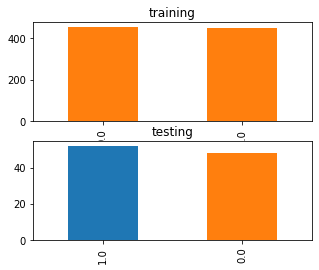

In [26]:
x_train
x_test
y_train
len(y_test)

plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [27]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       ...,
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186],
       [-0.03351301, -0.0333631 , -0.0333631 , -0.03335187,  0.03335265,
        -0.03335186]])

In [28]:
math.sqrt(len(y_test))

10.0

In [29]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [30]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[47  1]
 [48  4]]
Akurasi : 0.51
presisi : [0.49473684 0.8       ]
recall : [0.97916667 0.07692308]
F-Measure : [0.65734266 0.14035088]


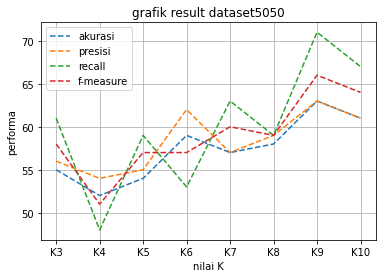

In [0]:
#dataset5050
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8","K9","K10"]
a = [55, 52, 54, 59, 57, 58 , 63 ,61]
p = [56, 54, 55, 62, 57, 59, 63, 61]
r = [61, 48, 59, 53, 63, 59, 71, 67]
f = [58, 51, 57, 57, 60, 59, 66, 64]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset5050")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()